<a href="https://colab.research.google.com/github/BelideSaiTeja/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

K-means clustering is one of the algorithms which unsupervised machine learning supports hence before moving forward with K-means let’s have background knowledge of the unsupervised learning method. In this method, we don’t have predefined labels unlike the supervised method hence we don’t draw predictions but make clusters/groupss out of them so that the data could get segmented according to the features that are fed to the model.

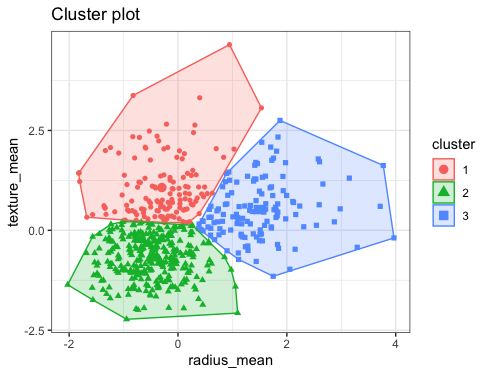

**Approach**



*   Select the number of clusters, and there are a few ways to select the appropriate number of clusters like the elbow method and domain knowledge.
*   Assigning the K points or we can also say randomly assigning the centroids from the dataset.
*   In the last step each K point will be adjusted closely towards its closest centroid that will eventually form the clusters/group.



**Working**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
X = np.array([[1,2], [1.5, 1.8], [5,8], [8,8], [1,0.6], [9,11]])

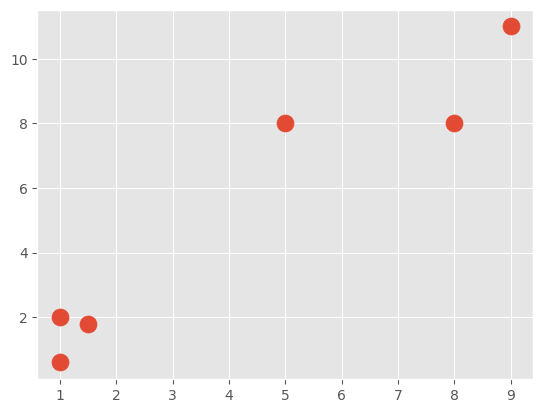

In [ ]:
plt.scatter(X[:,0], X[:,1], s = 150)
plt.show()

In [ ]:
clf = KMeans(n_clusters = 2)
clf.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [ ]:
colors = ['b.', 'r.', 'g.', 'c.', 'k.']

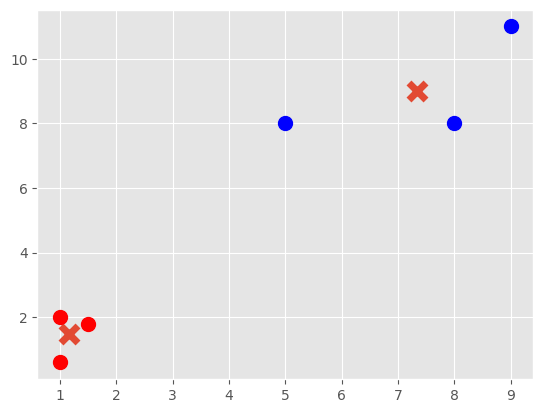

In [ ]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 20)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5)
plt.show()

**Working on Titanic Dataset**

Handling Non-Numeric data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [ ]:
df = pd.read_excel('/content/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.drop(['body', 'name'], axis = 'columns', inplace = True)

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df.apply(pd.to_numeric, errors = 'ignore')

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,761,211.3375,186,2,1,115
1,1,1,0,0.9167,1,2,507,151.5500,13,2,26,153
2,1,0,1,2.0000,1,2,507,151.5500,13,2,8,153
3,1,0,0,30.0000,1,2,507,151.5500,13,2,8,153
4,1,0,1,25.0000,1,2,507,151.5500,13,2,8,153
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,14.5000,1,0,368,14.4542,57,3,8,32
1305,3,0,1,0.0000,1,0,368,14.4542,57,3,8,32
1306,3,0,0,26.5000,0,0,37,7.2250,57,3,8,32
1307,3,0,0,27.0000,0,0,264,7.2250,57,3,8,32


In [ ]:
df.dtypes

pclass         int64
survived       int64
sex            int64
age          float64
sibsp          int64
parch          int64
ticket         int64
fare         float64
cabin          int64
embarked       int64
boat           int64
home.dest      int64
dtype: object

In [ ]:
def handle_non_numeric_data(df):
  columns = df.columns.values

  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x += 1
      df[column] = list(map(convert_to_int, df[column]))
  return df

In [ ]:
df = handle_non_numeric_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,761,211.3375,186,2,1,115
1,1,1,0,0.9167,1,2,507,151.5500,13,2,26,153
2,1,0,1,2.0000,1,2,507,151.5500,13,2,8,153
3,1,0,0,30.0000,1,2,507,151.5500,13,2,8,153
4,1,0,1,25.0000,1,2,507,151.5500,13,2,8,153


In [ ]:
X = np.array(df.drop(['survived'], axis = 'columns').astype(float))
y = np.array(df.survived)

In [ ]:
clf = KMeans(n_clusters = 2)
clf.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
correct_ = 0
for i in range(len(X)):
  predict_me = np.array(X[i].astype(float))
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = clf.predict(predict_me)
  if prediction[0] == y[i]:
    correct_ += 1

print(correct_/len(X))

0.5103132161955691


In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
clf = KMeans(n_clusters = 2)
clf.fit(X_scaled)

correct = 0
for i in range(len(X_scaled)):
  predict_me = np.array(X_scaled[i].astype(float))
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = clf.predict(predict_me)
  if prediction[0] == y[i]:
    correct += 1

print(correct/len(X_scaled))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6913674560733384


Without scalng the data, Accuracy = 0.5103132161955691

After scalng the data, Accuracy = 0.6913674560733384

Improved Accuracy can be acquired by dropping some of the columns which has least effect.

In [ ]:
set(clf.labels_)

{0, 1}

**KMEANS CLUSTERING FROM SCRATCH WITHOUT SCIKIT LEARN**

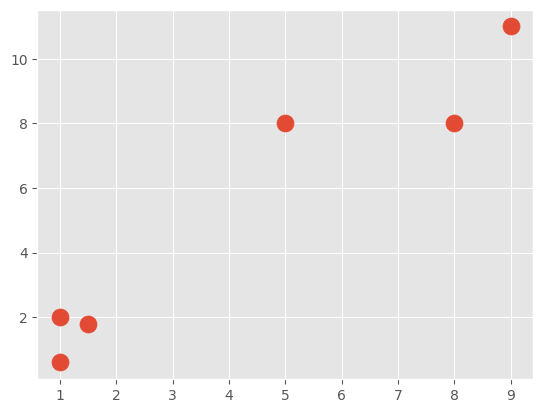

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

453.3333333333334
102.72108843537411


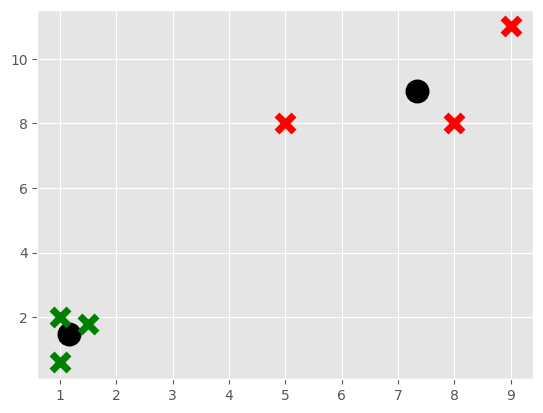

In [ ]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

**Clustering using MeanShift**

In contrast to KMeans, in MeanShift, no. of clusters will be predicted, whereas in KMeans it is predefined.

Mean Shift is very similar to the K-Means algorithm, except for one very important factor: you do not need to specify the number of groups prior to training. The Mean Shift algorithm finds clusters on its own. For this reason, it is even more of an "unsupervised" machine learning algorithm than K-Means.

While this method is a hierarchical clustering method, your kernel can be flat or something like a Gaussian kernel.

Mean Shift is also very popular in image analysis for both tracking and smoothing.

[[ 0.48458704  0.72216442  0.96493664]
 [ 4.8860332   5.45020292  4.60797453]
 [ 2.66060819 10.05304892  9.91379474]]
Number of estimated clusters: 3


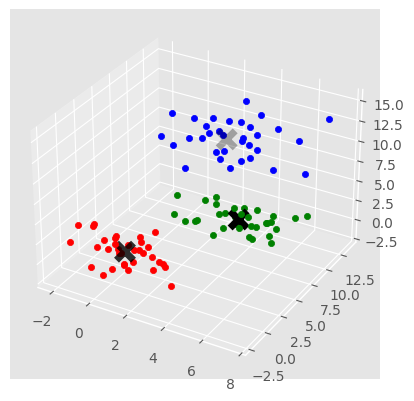

In [ ]:
import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

**Meanshift with Titanic Dataset**

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

# Handling Non-Numeric Data
def handle_non_numerical_data(df):

    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:

            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string.
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])


<ipython-input-77-cfa1eee2ee38>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['body','name'], 1, inplace=True)
<ipython-input-77-cfa1eee2ee38>:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['ticket','home.dest'], 1, inplace=True)
<ipython-input-77-cfa1eee2ee38>:46: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['survived'], 1).astype(float))


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

clf = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clf.fit(X)
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
cluster_centers

array([[ 4.50108627e-01, -2.99252097e-01, -1.39670517e-01,
        -2.62348539e-01, -3.16081755e-01, -3.88235507e-01,
        -4.27518074e-01, -2.32638185e-01, -4.62948675e-01],
       [ 8.41916418e-01,  5.99105347e-01,  6.60964571e-01,
         2.06895048e-01,  4.83848665e+00, -9.32280503e-03,
        -4.50896828e-01, -5.31413633e-01, -6.23409233e-01],
       [ 8.41916418e-01,  1.84721933e-01, -1.26627855e+00,
         7.20390950e+00,  1.86652569e+00,  7.01369710e-01,
        -4.50896828e-01, -6.18968126e-01, -6.31465175e-01],
       [-1.54609786e+00,  3.00749289e-01,  9.73746652e-01,
        -4.79086761e-01,  1.32881796e-01,  9.26124543e+00,
         9.16884030e-01,  1.83255767e+00,  1.06028250e+00],
       [ 8.41916418e-01,  3.00749289e-01, -1.35790158e+00,
         4.81287772e-01,  9.95686385e+00,  7.01369710e-01,
        -4.50896828e-01, -6.18968126e-01, -6.31465175e-01],
       [-1.54609786e+00, -7.43496915e-01,  2.28174444e+00,
         4.81287772e-01,  4.17805088e+00,  4.441174

Further Reading

**Meanshift Clusterig**

https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#compute-clustering-with-meanshift